## Problem Statement

### Its the company analysis, where company want to know the reason if employees are absent or not active in working hrs and what are the reasons

In [46]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

In [47]:
df = pd.read_csv('Absenteeism_data.csv')

In [48]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [49]:
df.tail()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2
699,15,28,31/05/2018,291,31,40,237.656,25,1,1,1,2


In [50]:
df.shape

(700, 12)

In [51]:
df.size

8400

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [53]:
df.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

In [54]:
col_to_use = ['Age','Body Mass Index','Education','Children','Pets','Absenteeism Time in Hours']
df1 = df[col_to_use]

In [55]:
df.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [56]:
df.corr()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
ID,1.000000,-0.079111,-0.203788,-0.493562,0.041367,0.092873,-0.320718,-0.032889,0.026095,0.005380,-0.005469
Reason for Absence,-0.079111,1.000000,-0.131790,0.160059,-0.055210,-0.130406,0.052741,-0.060083,-0.050053,-0.032872,-0.175826
Transportation Expense,-0.203788,-0.131790,1.000000,0.234940,-0.223828,0.006123,-0.140531,-0.054597,0.381749,0.446887,0.008342
Distance to Work,-0.493562,0.160059,0.234940,1.000000,-0.131076,-0.073683,0.136190,-0.282600,0.048534,0.171585,-0.080593
Age,0.041367,-0.055210,-0.223828,-0.131076,1.000000,-0.045452,0.483762,-0.209330,0.046930,-0.252067,0.035784
Daily Work Load Average,0.092873,-0.130406,0.006123,-0.073683,-0.045452,1.000000,-0.098430,-0.077012,0.032194,0.010490,0.029609
Body Mass Index,-0.320718,0.052741,-0.140531,0.136190,0.483762,-0.098430,1.000000,-0.348758,-0.155711,-0.066484,-0.040203
Education,-0.032889,-0.060083,-0.054597,-0.282600,-0.209330,-0.077012,-0.348758,1.000000,-0.179521,-0.080899,-0.035621
Children,0.026095,-0.050053,0.381749,0.048534,0.046930,0.032194,-0.155711,-0.179521,1.000000,0.116586,0.093661
Pets,0.005380,-0.032872,0.446887,0.171585,-0.252067,0.010490,-0.066484,-0.080899,0.116586,1.000000,-0.024522


<AxesSubplot: >

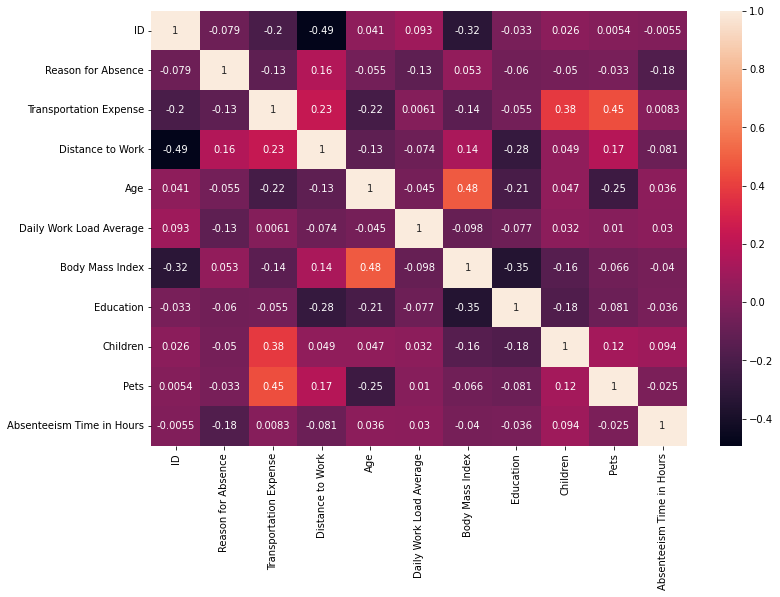

In [57]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True)

In [58]:
df = df.drop('ID',axis = 1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [59]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [60]:
df_dummies = pd.get_dummies(df['Reason for Absence'])
df_dummies.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [61]:
# Stpe 5 : if possible or needed group the column to reduce the data size
group_1 = df_dummies.loc[:,1:14].max(axis=1)
group_2 = df_dummies.loc[:,15:17].max(axis=1)
group_3 = df_dummies.loc[:,18:21].max(axis=1)
group_4 = df_dummies.loc[:,22:].max(axis=1)

In [62]:
#step 6: after creating groups of dummies concat it with the data
df= pd.concat([df,group_1,group_2,group_3,group_4],axis=1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [63]:
df = df.drop(['Reason for Absence'],axis=1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [64]:
col_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Group_1','Group_2','Group_3','Group_4']
df.columns = col_names

In [65]:
# Reorder the columns 
col_names_reordered = ['Group_1','Group_2','Group_3','Group_4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']
df=df[col_names_reordered]
df.head()

,Group_1,Group_2,Group_3,Group_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [66]:
# step 7 : handling the date codf_mod['Date']=pd.to_datetime(df_mod['Date'], format ='%d/%m/%Y')lumn as it is string object in dataset
df_mod = df.copy()

In [67]:
type(df_mod['Date'][0])

str

In [68]:
df_mod['Date']=pd.to_datetime(df_mod['Date'], format ='%d/%m/%Y')

In [69]:
type(df_mod['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [70]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Group_1                    700 non-null    uint8         
 1   Group_2                    700 non-null    uint8         
 2   Group_3                    700 non-null    uint8         
 3   Group_4                    700 non-null    uint8         
 4   Date                       700 non-null    datetime64[ns]
 5   Transportation Expense     700 non-null    int64         
 6   Distance to Work           700 non-null    int64         
 7   Age                        700 non-null    int64         
 8   Daily Work Load Average    700 non-null    float64       
 9   Body Mass Index            700 non-null    int64         
 10  Education                  700 non-null    int64         
 11  Children                   700 non-null    int64         
 12  Pets    

In [71]:
# Extract the month valuyes
df_mod['Date'][0].month

7

In [72]:
list_months = []
for i in range(700):
    list_months.append(df_mod['Date'][i].month)
len(list_months)

700

In [73]:
df_mod['month'] = list_months

In [74]:
def day_of_week(date_value):
    return date_value.weekday()

df_mod['day of the week'] = df_mod['Date'].apply(day_of_week)

In [75]:
col = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Date','month',
       'day of the week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', ]

df_mod=df_mod[col]

In [76]:
df = df_mod.drop(["Date"],axis=1)

In [77]:
### Conversion of Target column

In [78]:
df['Absenteeism Time in Hours'].value_counts()

8      195
2      149
3      106
1       87
4       57
0       39
16      18
24      15
5        7
40       7
32       6
64       3
56       2
80       2
120      2
112      2
7        1
104      1
48       1
Name: Absenteeism Time in Hours, dtype: int64

In [79]:
df['Absenteeism Time in Hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

In [80]:
df['Absenteeism Time in Hours'].median()

3.0

In [81]:
target = np.where(df['Absenteeism Time in Hours']>df['Absenteeism Time in Hours'].median(),1,0)

<IPython.core.display.Javascript object>

#### for target column median is 3 , meaning value below 3 is accepted or normal but above 3 is not accepted as it is badly affecting the company project completion hours 

In [82]:
target[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [83]:
df['Excessive_absenteeism']=target

In [84]:
df = df.drop('Absenteeism Time in Hours',axis=1)

### Univariate Analysis

C:\Users\ervai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Distance to Work', ylabel='Density'>

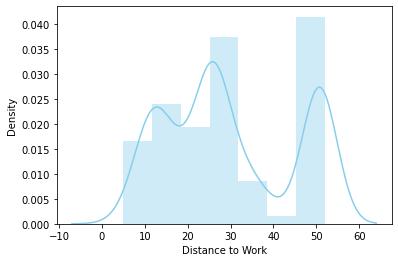

In [85]:
sns.distplot(df['Distance to Work'], color="skyblue")

C:\Users\ervai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Group_1', ylabel='Density'>

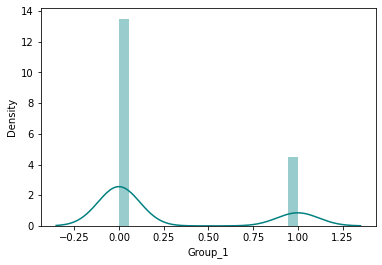

In [86]:
sns.distplot(df['Group_1'], color="teal")

C:\Users\ervai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Group_2', ylabel='Density'>

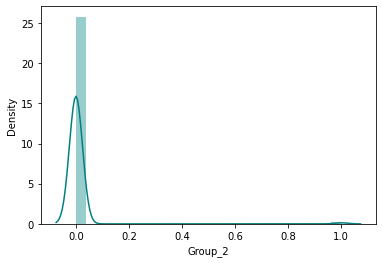

In [87]:
sns.distplot(df['Group_2'], color="teal")

C:\Users\ervai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Group_3', ylabel='Density'>

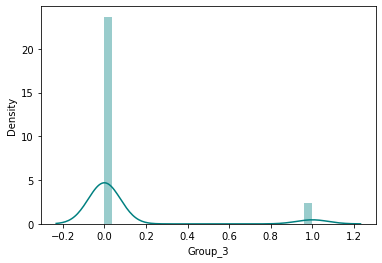

In [88]:
sns.distplot(df['Group_3'], color="teal")

C:\Users\ervai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Group_4', ylabel='Density'>

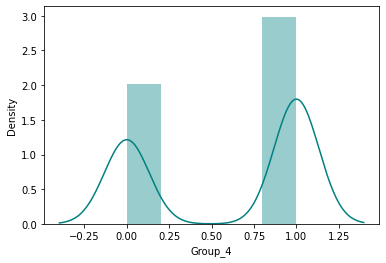

In [89]:
sns.distplot(df['Group_4'], color="teal")

C:\Users\ervai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Group_4', ylabel='count'>

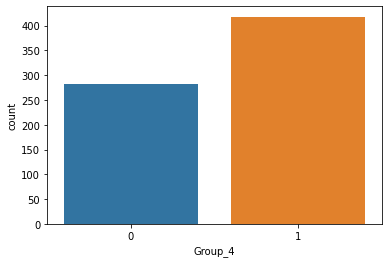

In [90]:
sns.countplot(df['Group_4'])

In [91]:
#sns.catplot(df['Group_4'])

C:\Users\ervai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Children', ylabel='Density'>

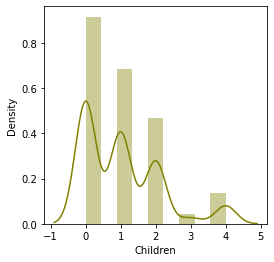

In [92]:
plt.figure(figsize=(4,4))
sns.distplot(df['Children'], color="olive")

C:\Users\ervai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Body Mass Index', ylabel='Density'>

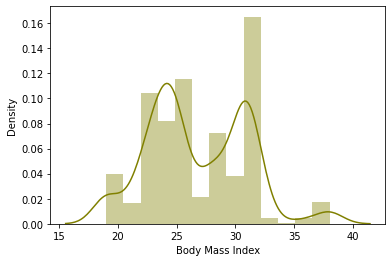

In [93]:
sns.distplot(df['Body Mass Index'], color="olive")

In [95]:
#plt.scatter(df['Daily Work Load Average'],df['Absenteeism Time in Hours'],marker = '*')

In [ ]:
plt.scatter(df['Age'],df['Absenteeism Time in Hours'],marker = '*')

(array([439., 132.,  92.,   0.,   0.,  29.,   5.,   0.,   0.,   3.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

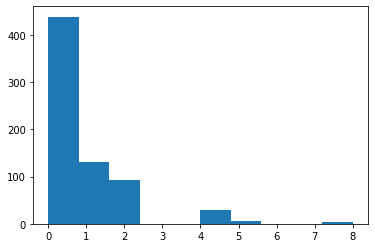

In [96]:
plt.hist(df['Pets'],bins = 10)

### Multi-variate Analysis

In [97]:
import sweetviz as si

### selecting Dependent and Independent Variable

In [99]:
x = df.drop(['Excessive_absenteeism'],axis = 1)
y = df['Excessive_absenteeism']

In [100]:
my_report = si.analyze(x)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [102]:
df.columns

Index(['Group_1', 'Group_2', 'Group_3', 'Group_4', 'month', 'day of the week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Excessive_absenteeism'],
      dtype='object')

C:\Users\ervai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


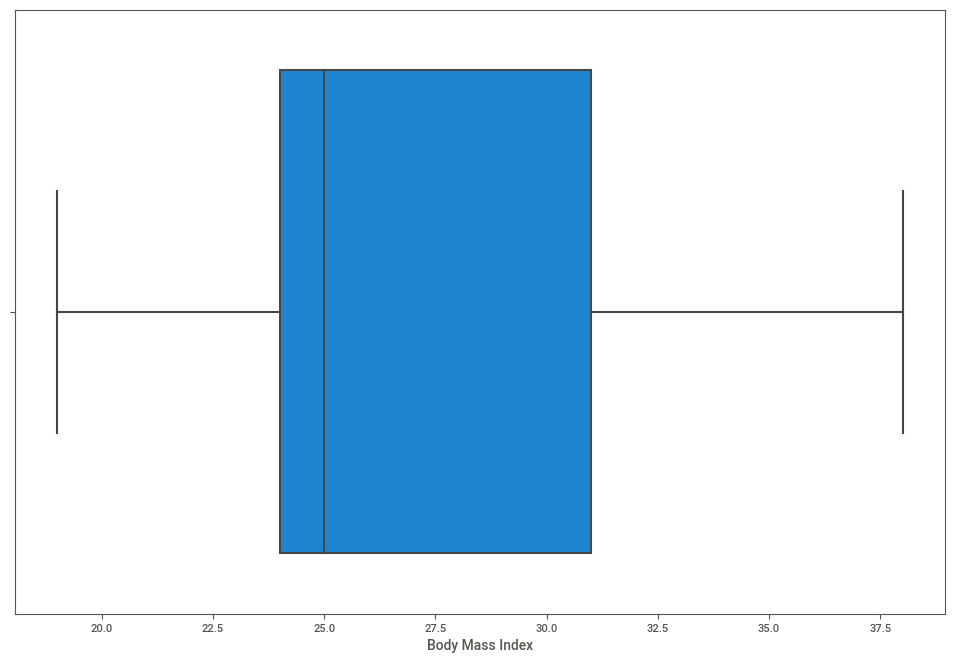

In [103]:
plt.figure(figsize=(12,8))
sns.boxplot(df['Body Mass Index']);

C:\Users\ervai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


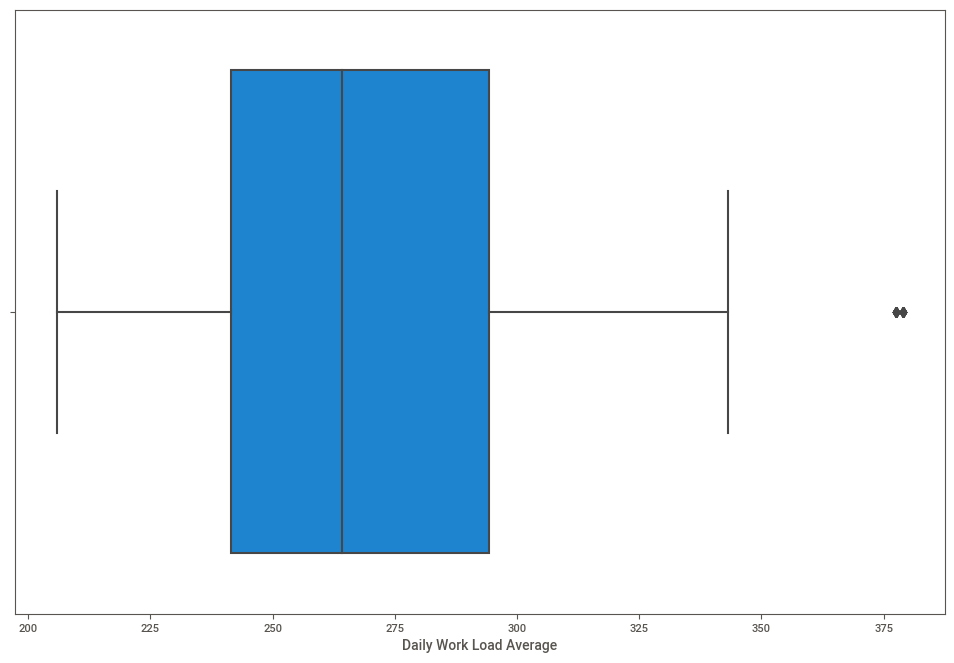

In [104]:
plt.figure(figsize=(12,8))
sns.boxplot(df['Daily Work Load Average']);

#### From the above boxplot analysis we can say that there are no outliers so we didn't handled it. Also the dataset Size is too small so every record is important for prediction

In [105]:
df['Group_1'].value_counts()

0    525
1    175
Name: Group_1, dtype: int64

<AxesSubplot: >

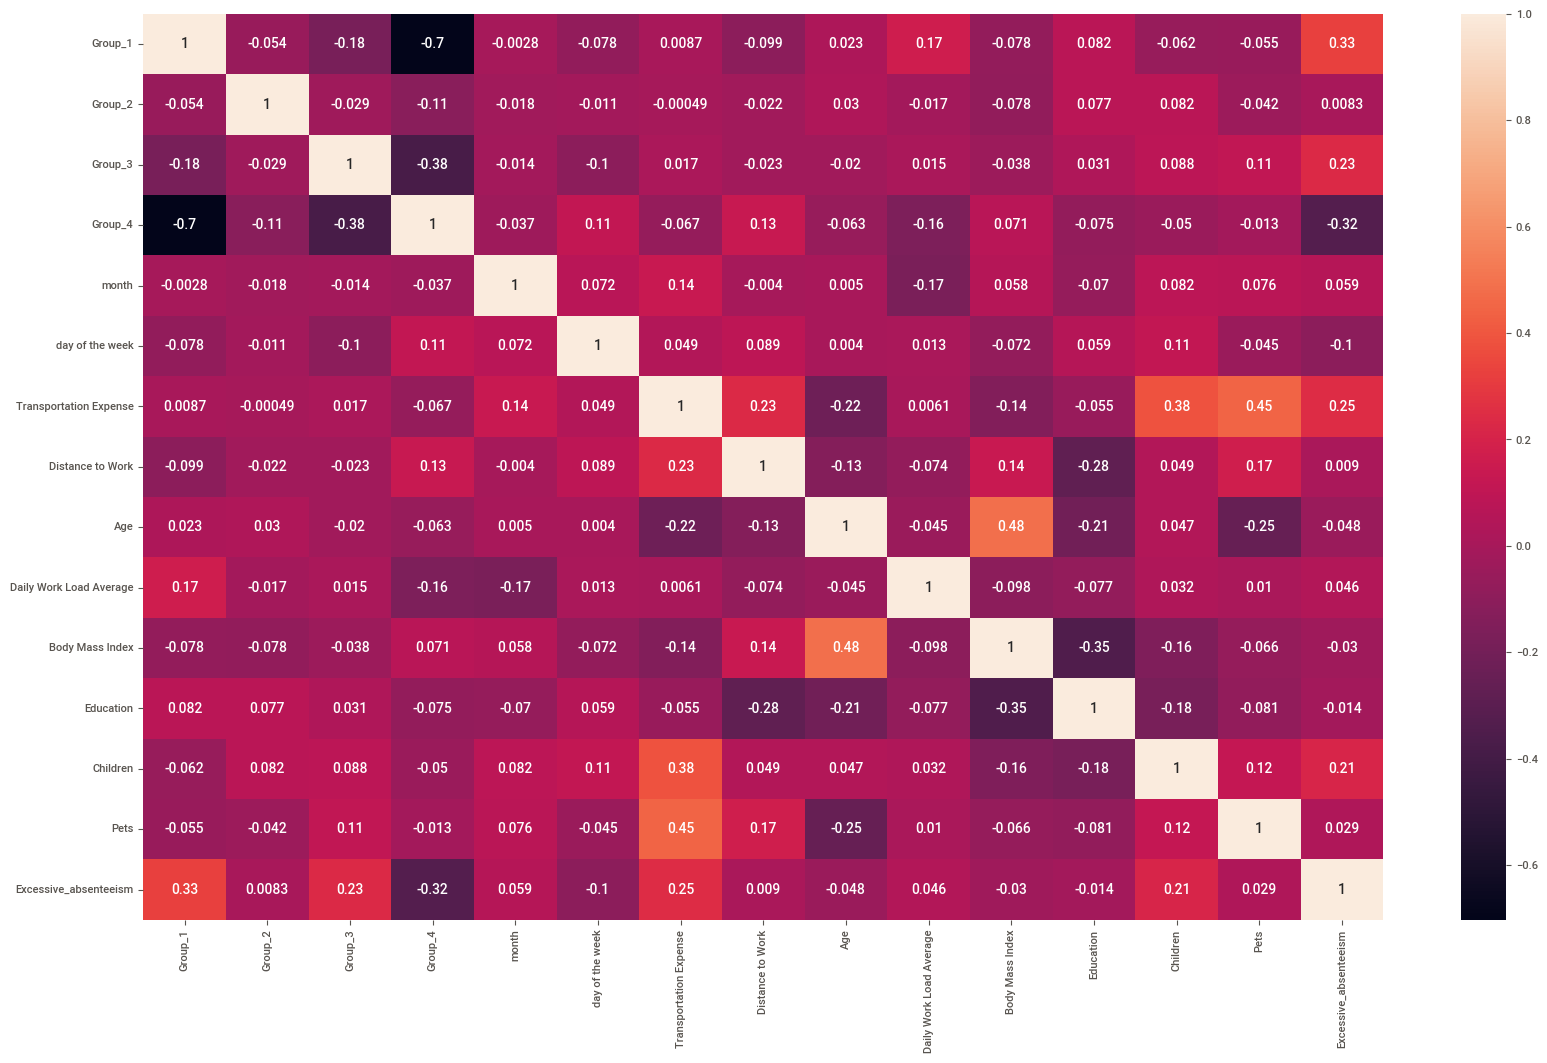

In [106]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(),annot = True)

In [107]:
df.head()

,Group_1,Group_2,Group_3,Group_4,month,day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive_absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,0


In [108]:
df.columns

Index(['Group_1', 'Group_2', 'Group_3', 'Group_4', 'month', 'day of the week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Excessive_absenteeism'],
      dtype='object')

### Standardization 

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

### Spliting data into train and test

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train,X_test,y_train,y_test = train_test_split(scaled, y,test_size=0.2
                                                 ,random_state = 42)

In [116]:
X_train.shape,X_test.shape

((560, 14), (140, 14))

In [117]:
y_train.shape,y_test.shape

((560,), (140,))

### Logistic Regression 

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
lr = LogisticRegression(random_state = 42)

In [127]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [128]:
lr.score(X_train,y_train)

0.775

In [129]:
lr.score(X_test,y_test)

0.7571428571428571

In [130]:
predict = lr.predict(X_test)

In [131]:
# Build a confusion_metrics :-
from sklearn.metrics import confusion_matrix
# confusion_metrics :
logg_conf = confusion_matrix(predict , y_test)
logg_conf

array([[65, 17],
       [17, 41]], dtype=int64)

In [132]:
# check for the accuracy and other parameters :
from sklearn.metrics import classification_report
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        82
           1       0.71      0.71      0.71        58

    accuracy                           0.76       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.76      0.76      0.76       140



## CROSS VALIDATION ON lOGISTIC REGRESSION

In [ ]:
param = {'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
          'penalty' : ('l1', 'l2', 'elasticnet', 'none'),
          'C' : [1,2,3,4,5],
        'n_jobs' : [-1,-2,-3,-4,-5]}
grid_search_cv = GridSearchCV(LogisticRegression(random_state=42),
                             param,cv=10)
grid_search_cv.fit(X_train,y_train)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

In [ ]:
dtc.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = dtc.predict(X_train)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
y_pred=dtc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print('test_accuracy : ',test_accuracy)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=40)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
rfc.score(X_train,y_train)

In [ ]:
rfc.score(X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = rfc.predict(X_train)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
y_pred=rfc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print('test_accuracy : ',test_accuracy)

### K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_N_N =  KNeighborsClassifier()

In [ ]:
k_N_N.fit(X_train,y_train)

In [ ]:
k_N_N.score(X_test,y_test)

In [ ]:
k_N_N.score(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = k_N_N.predict(X_train)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
y_pred=k_N_N.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print('test_accuracy : ',test_accuracy)

In [ ]:
sklearn.neighbors.VALID_METRICS['brute']

### Support Vector Machine

In [ ]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

training_accuracy = model.score(X_train,y_train)
print('training accuracy : ',training_accuracy)
testing_accuracy = model.score(X_test,y_test)
print('testing accuracy : ',testing_accuracy)

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbrt = GradientBoostingClassifier(n_estimators = 40,random_state=42)

In [ ]:
param = {'max_depth' : [1,2,3,4,5],
        'n_estimators' : [50,75,100,125,150,175,200],
         'loss' : ('deviance', 'exponential'),
        'learning_rate' : [0.01,0.1,0.2,0.5,1]}
grid_search_cv = GridSearchCV(GradientBoostingClassifier(random_state=42),
                             param,cv=10)
grid_search_cv.fit(X_train,y_train)

In [ ]:
gbrt.fit(X_train,y_train)

In [ ]:
gbrt.score(X_train,y_train)

In [ ]:
gbrt.score(X_test,y_test)

In [ ]:
predicted_proba = gbrt.predict_proba(X_test)
predicted_proba[:,1]

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(scaled)
X_pca.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train,y_test = train_test_split(X_pca,y, test_size = 0.2, random_state = 42)

In [ ]:
pca.n_components_

In [ ]:
gbrt.fit(X_train_pca,y_train)

In [ ]:
gbrt.score(X_train_pca,y_train)

In [ ]:
gbrt.score(X_test_pca,y_test)

### Cross validation on Logistic Regression

In [ ]:
param = {'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
          'penalty' : ('l1', 'l2', 'elasticnet', 'none'),
          'C' : [1,2,3,4,5],
        'n_jobs' : [-1,-2,-3,-4,-5]}
grid_search_cv = GridSearchCV(LogisticRegression(random_state=42),
                             param,cv=10)
grid_search_cv.fit(X_train,y_train)

In [ ]:
grid_search_cv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = grid_search_cv.predict(X_train)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
y_pred=grid_search_cv.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print('test_accuracy : ',test_accuracy)

### Cross validation on Desision Tree

In [ ]:
param = {'max_leaf_nodes':list(range(2,40)),
        'min_samples_split':[2,3,4],
        'min_samples_leaf':list(range(5,15))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                             param,cv=10)
grid_search_cv.fit(X_train,y_train)

In [ ]:
grid_search_cv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = grid_search_cv.predict(X_train)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
y_pred=grid_search_cv.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print('test_accuracy : ',test_accuracy)

### Cross validation on Random Forest 

In [ ]:
param = {'criterion': ('entropy','gini'),
          'min_samples_split' : [1,2,3,4,5],
          'n_estimators' : list(range(5,50))}
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42),
                             param,cv=10)
grid_search_cv.fit(X_train,y_train)

In [ ]:
grid_.search_cv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = grid_search_cv.predict(X_train)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
y_pred=grid_search_cv.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print('test_accuracy : ',test_accuracy)

### Cross validation on K-Nearest Neighbours

In [ ]:
param = {'metric' : ('cityblock','wminkowski','euclidean','l1','l2','manhattan','chebyshev',
                     'minkowski','seuclidean'),
         'n_neighbors': [3,4,5,6,7],
        'n_jobs'l : [-1,-2,-3]}
grid_search_cv = GridSearchCV(KNeighborsClassifier(),
                             param,cv=10)
grid_search_cv.fit(X_train,y_train)


In [ ]:
df = pd.DataFrame({'Algorithm':('Logistic_Regression','Decision_Tree_Classifier','Random_Forest_Classifier','Support_Vector_Machine','K_Nearest_Neighbour','Gradient_Boosting',
                                'Cross_Validation_on_Logistic_Regression','Cross_Validation_on_Decision_Tree','Cross_Validation_on_Random_Forest',
                                'Cross_Validation_on_KNeighborsClassifier','Cross_Validation_on_Support_vector_Classifier','Cross_Validation_on_GradientBoostingClassifier'),
                  'Training_Accuracy':(0.78036,0.81607,0.95357,0.77500,0.80571,0.86781,0.78392,0.77678,0.91257,0.82857,0.79107,0.88750),
                   'Testing_Accuracy':(0.77142,0.75714,0.77857,0.75714,0.78571,0.75714,0.76428,0.76428,0.77142,0.78571,0.77142,0.80000)
                  })
df